In [46]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample # module for resampling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPClassifier

import statistics
import math
import time
from datetime import datetime

from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

In [2]:
#read in the csv
# MY_PATH = "/Users/mattiesanseverino/ucla/188/project_src/datasets/training_data_cleaned.csv"
# MY_PATH = "/Users/Tanya/Documents/cs188_project/NEXT_trucking_project/datasets/training_data_cleaned.csv"
MY_PATH = "./datasets/training_data_cleaned.csv"
data = pd.read_csv(MY_PATH)

# Take a look at the data

In [3]:
data.head()

,Unnamed: 0,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,...,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads,date,recent_date
0,0,2021-01-20,3,2021,30222,U0117613,Owner Operator,Rosas Transport,Santa Fe Springs,CA,...,4,1,253,254,0,3,3,257,2021-01-20,2021-02-17
1,1,2020-03-09,1,2020,4524,C0090405,Fleet,Daylight Transport,Long Beach,CA,...,6,0,0,0,2671,0,2671,2671,2020-03-09,2021-02-15
2,2,2020-02-14,5,2020,31164,C0097099,Fleet,First Class Transport #8,Hawthorne,CA,...,1,29,82,111,30,19,49,160,2020-02-14,2020-12-18
3,3,2019-06-10,1,2019,8859,U0097935,Owner Operator,DTELLIS TRUCKING,Long Beach,CA,...,1,25,6,31,0,1,1,32,2019-06-10,2020-02-16
4,4,2019-12-03,2,2019,18870,U0106560,Owner Operator,Z&N Transport,Los Angeles,CA,...,4,1,233,234,0,9,9,243,2019-12-03,2020-02-18


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83414 entries, 0 to 83413
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                83414 non-null  int64  
 1   dt                        83414 non-null  object 
 2   weekday                   83414 non-null  int64  
 3   year                      83414 non-null  int64  
 4   id_driver                 83414 non-null  int64  
 5   id_carrier_number         83414 non-null  object 
 6   dim_carrier_type          83414 non-null  object 
 7   dim_carrier_company_name  83367 non-null  object 
 8   home_base_city            83369 non-null  object 
 9   home_base_state           83369 non-null  object 
 10  carrier_trucks            83414 non-null  object 
 11  num_trucks                83344 non-null  float64
 12  interested_in_drayage     83414 non-null  object 
 13  port_qualified            83414 non-null  object 
 14  signup

In [5]:
data.describe()

,Unnamed: 0,weekday,year,id_driver,num_trucks,days_signup_to_approval,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads
count,83414.000000,83414.000000,83414.000000,83414.000000,83344.000000,71142.000000,83414.000000,83414.000000,83414.000000,83414.000000,83414.000000,83414.000000,83414.000000,83414.000000
mean,41706.500000,3.500060,2018.960870,18224.058060,22.579538,298.646201,2.075659,29.536241,71.511533,101.047774,148.027561,13.080166,161.107728,266.273371
std,24079.692014,1.687443,1.359275,11667.851627,48.816676,390.377138,2.669705,88.308416,194.548817,214.587614,415.376825,42.274194,413.197837,448.353468
min,0.000000,1.000000,2015.000000,20.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20853.250000,2.000000,2018.000000,7890.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,37.000000
50%,41706.500000,3.000000,2019.000000,16299.000000,4.000000,61.000000,1.000000,2.000000,0.000000,13.000000,15.000000,0.000000,37.000000,110.000000
75%,62559.750000,5.000000,2020.000000,28974.000000,14.000000,497.000000,2.000000,23.000000,18.000000,94.000000,110.000000,1.000000,135.000000,325.000000
max,83413.000000,7.000000,2021.000000,38096.000000,195.000000,1653.000000,129.000000,902.000000,1324.000000,1348.000000,4266.000000,371.000000,4266.000000,4266.000000


In [6]:
# Drop extra column

data = data.drop(labels=['Unnamed: 0'], axis=1)
data.head()

,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,carrier_trucks,...,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads,date,recent_date
0,2021-01-20,3,2021,30222,U0117613,Owner Operator,Rosas Transport,Santa Fe Springs,CA,"[""poweronly""]",...,4,1,253,254,0,3,3,257,2021-01-20,2021-02-17
1,2020-03-09,1,2020,4524,C0090405,Fleet,Daylight Transport,Long Beach,CA,"[""dryvan""]",...,6,0,0,0,2671,0,2671,2671,2020-03-09,2021-02-15
2,2020-02-14,5,2020,31164,C0097099,Fleet,First Class Transport #8,Hawthorne,CA,"[""poweronly"", ""dryvan""]",...,1,29,82,111,30,19,49,160,2020-02-14,2020-12-18
3,2019-06-10,1,2019,8859,U0097935,Owner Operator,DTELLIS TRUCKING,Long Beach,CA,"[""dryvan""]",...,1,25,6,31,0,1,1,32,2019-06-10,2020-02-16
4,2019-12-03,2,2019,18870,U0106560,Owner Operator,Z&N Transport,Los Angeles,CA,"[""dryvan""]",...,4,1,233,234,0,9,9,243,2019-12-03,2020-02-18


# Part 1: Generate labels
## drivers in the 75th percentile of ‘loads’ and the 75th percentile of ‘most_recent_load_date’ are assigned a label of 1 (indicating a high performing driver) with all others being assigned a 0 - (NOTE: your labels will likely be unbalanced. 

### pre-work from Piazza that must be done

- collapse your rows by trimming any duplicative entries per-driver, and only leaving the most recent (and therefore cumulative with regards to features like loads) entry. 
- Thereby each row is it's own driver, and it more closely fits the desired model. 
- If you take this approach, it would be worth playing around with different augmentations to provide additional nuance to your data. (e.g., while you have a total count of loads, you don't have a clear indication of the distribution of those loads. Is this an older driver who was active several years ago but now works irregularly, or is this a new driver that's been very active in the last few months?) Boiling up that kind of data into your features could be incredibly powerful.

In [7]:
#for each duplicate of a driver id 'id_driver', cumulate the 'load' values for this driver 
#AND add the median load for this driver as a new column 'median_load'

drivers = list(set(data['id_driver'])) #get rid of duplicates
rows_to_keep = []
median_loads = []

for d in drivers:
    loads_for_driver = data.loc[data['id_driver'] == d]

    most_recent_date = list(loads_for_driver['most_recent_load_date'])[0]
    
    loads = sum(loads_for_driver['loads'])
    median_load = statistics.median(list(loads_for_driver['loads']))
    
    row = loads_for_driver.loc[loads_for_driver['dt'] == most_recent_date]
    row['median_load'] = median_load
    row['loads'] = loads

    rows_to_keep.append(row)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
# DF with one row per driver, created from rows_to_keep -- ISSUE somehow goes from 5288 -> 5255

condensed_data = pd.concat(rows_to_keep)
print("rows to keep:", len(rows_to_keep))
print("rows in condensed_data:", len(condensed_data))
condensed_data.head()

rows to keep: 5288
rows in condensed_data: 5255


,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,carrier_trucks,...,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads,date,recent_date,median_load
12922,2016-06-20,1,2016,20,U0000035,Owner Operator,Mega Fleet Corp,Pasadena,CA,"[""dryvan""]",...,0,0,0,42,0,42,42,2016-06-20,2016-06-20,1.0
17520,2015-10-29,4,2015,26,U0000041,Owner Operator,NaN,"Sierra Madre,",CA,"[""dryvan""]",...,0,0,0,1,0,1,1,2015-10-29,2015-10-29,1.0
30284,2015-12-09,3,2015,27,U0000042,Owner Operator,NaN,"Sierra Madre,",CA,"[""dryvan""]",...,0,0,0,11,0,11,11,2015-12-09,2015-12-09,1.0
61261,2018-12-05,3,2018,30,U0000045,Owner Operator,A & J Transport,Riverside,CA,"[""reefer""]",...,0,0,0,4,0,4,4,2018-12-05,2018-12-05,1.0
25636,2016-04-01,5,2016,31,U0000046,Owner Operator,lv transportation llc,NaN,NaN,"[""dryvan""]",...,0,0,0,15,0,15,15,2016-04-01,2016-04-01,1.0


In [9]:
condensed_data.describe()

,weekday,year,id_driver,num_trucks,days_signup_to_approval,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads,median_load
count,5255.000000,5255.000000,5255.000000,5213.000000,3936.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000
mean,3.327878,2018.711893,17729.890580,16.623825,290.588669,32.329781,4.675737,9.080875,13.756613,14.868696,2.391056,17.259753,32.614272,1.257279
std,1.637614,1.434644,11623.779688,40.549150,367.951425,121.700428,20.449086,58.914784,63.390272,98.905258,17.796204,100.282773,122.920006,1.428952
min,1.000000,2015.000000,20.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,2018.000000,8048.500000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.000000,2019.000000,15228.000000,4.000000,108.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000
75%,5.000000,2020.000000,29290.500000,11.000000,489.250000,17.000000,2.000000,0.000000,4.000000,4.000000,0.000000,5.000000,17.000000,1.000000
max,7.000000,2021.000000,38096.000000,195.000000,1653.000000,4250.000000,902.000000,1324.000000,1348.000000,4266.000000,371.000000,4266.000000,4266.000000,80.000000


In [10]:
condensed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5255 entries, 12922 to 44688
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dt                        5255 non-null   object 
 1   weekday                   5255 non-null   int64  
 2   year                      5255 non-null   int64  
 3   id_driver                 5255 non-null   int64  
 4   id_carrier_number         5255 non-null   object 
 5   dim_carrier_type          5255 non-null   object 
 6   dim_carrier_company_name  5248 non-null   object 
 7   home_base_city            5243 non-null   object 
 8   home_base_state           5243 non-null   object 
 9   carrier_trucks            5255 non-null   object 
 10  num_trucks                5213 non-null   float64
 11  interested_in_drayage     5255 non-null   object 
 12  port_qualified            5255 non-null   object 
 13  signup_source             5255 non-null   object 
 14  ts_

In [11]:
# compute the 75th percentile for total loads 
# (piazza @222 says to use 75th percentile from whole dataset before dropping duplicates)
load_percentile = data["total_loads"].quantile(0.75)
print("75th percentile of total_loads for full dataset:", load_percentile)

75th percentile of total_loads for full dataset: 325.0


In [12]:
# convert date to date object 
data.most_recent_load_date = [pd.to_datetime(d) for d in data.most_recent_load_date]
condensed_data.most_recent_load_date = [pd.to_datetime(d) for d in condensed_data.most_recent_load_date]

# calculate 75th percentile for most_recent_load_date in full dataset 
date_percentile = data["most_recent_load_date"].quantile(0.75)
print("75th percentile of most_recent_load_date for full dataset:", date_percentile)

75th percentile of most_recent_load_date for full dataset: 2021-02-14 00:00:00


In [13]:
# create a new column and use np.where to assign values based on most_recent_load_date and total_loads
condensed_data["high_performing"] = np.where((condensed_data["most_recent_load_date"] >= date_percentile) 
                                             & (condensed_data["total_loads"] >= load_percentile), 1, 0)

n_high_performers = len(condensed_data.loc[condensed_data["high_performing"] == 1])
n_non_high_performers = len(condensed_data.loc[condensed_data["high_performing"] == 0])


print("high performing drivers:", n_high_performers)
print("low performing drivers:", n_non_high_performers)

high performing drivers: 54
low performing drivers: 5201


## somehow we need to balance the data?

In [14]:
# balancing data by upsampling the high-performing drivers
majority = condensed_data[condensed_data["high_performing"] == 0]
minority = condensed_data[condensed_data["high_performing"] == 1]

# want to sample high-performers with replacement to match the number of non-high performing drivers
minority_upsampled = resample(minority, replace=True, n_samples=n_non_high_performers, random_state=42)
upsampled_data = pd.concat([majority, minority_upsampled])
upsampled_data["high_performing"].value_counts()
upsampled_data

,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,carrier_trucks,...,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads,date,recent_date,median_load,high_performing
12922,2016-06-20,1,2016,20,U0000035,Owner Operator,Mega Fleet Corp,Pasadena,CA,"[""dryvan""]",...,0,0,42,0,42,42,2016-06-20,2016-06-20,1.0,0
17520,2015-10-29,4,2015,26,U0000041,Owner Operator,NaN,"Sierra Madre,",CA,"[""dryvan""]",...,0,0,1,0,1,1,2015-10-29,2015-10-29,1.0,0
30284,2015-12-09,3,2015,27,U0000042,Owner Operator,NaN,"Sierra Madre,",CA,"[""dryvan""]",...,0,0,11,0,11,11,2015-12-09,2015-12-09,1.0,0
61261,2018-12-05,3,2018,30,U0000045,Owner Operator,A & J Transport,Riverside,CA,"[""reefer""]",...,0,0,4,0,4,4,2018-12-05,2018-12-05,1.0,0
25636,2016-04-01,5,2016,31,U0000046,Owner Operator,lv transportation llc,NaN,NaN,"[""dryvan""]",...,0,0,15,0,15,15,2016-04-01,2016-04-01,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71237,2021-02-17,3,2021,35150,C0097242,Fleet,MRH TRUCKING,Los Angeles,CA,"[""poweronly""]",...,364,364,0,27,27,391,2021-02-17,2021-02-17,3.0,1
2224,2021-02-17,3,2021,20443,C0093895,Fleet,EJG TRUCKING,Los Angeles,CA,"[""dryvan"", ""boxtruck""]",...,0,205,307,0,307,512,2021-02-17,2021-02-17,1.0,1
53631,2021-02-17,3,2021,36717,C0095984,Fleet,WESTERN CONTAIN TRANSPORTATION LLC,Los Angeles,CA,"[""poweronly""]",...,307,307,0,21,21,328,2021-02-17,2021-02-17,5.0,1
70181,2021-02-15,1,2021,33054,C0095478,Fleet,757 TRANSPORT INC,Lynwood,CA,"[""poweronly""]",...,505,507,3,57,60,567,2021-02-15,2021-02-15,3.0,1


# Step 2: Drop ‘load’ and ‘most_recent_load_date’ from your data frame 
Since those fields are
being directly used to label your data please remove them from your training and
testing cohorts.

In [15]:
# condensed_data = condensed_data.drop(labels=['total_loads', 'most_recent_load_date'], axis=1)
# condensed_data.info()

upsampled_data = upsampled_data.drop(labels=['total_loads', 'most_recent_load_date'], axis=1)
upsampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10402 entries, 12922 to 79320
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dt                        10402 non-null  object 
 1   weekday                   10402 non-null  int64  
 2   year                      10402 non-null  int64  
 3   id_driver                 10402 non-null  int64  
 4   id_carrier_number         10402 non-null  object 
 5   dim_carrier_type          10402 non-null  object 
 6   dim_carrier_company_name  10395 non-null  object 
 7   home_base_city            10390 non-null  object 
 8   home_base_state           10390 non-null  object 
 9   carrier_trucks            10402 non-null  object 
 10  num_trucks                10360 non-null  float64
 11  interested_in_drayage     10402 non-null  object 
 12  port_qualified            10402 non-null  object 
 13  signup_source             10402 non-null  object 
 14  ts

# 3. Run some basic statistics on your variables including correlations with labels and report findings 

1    5201
0    5201
Name: high_performing, dtype: int64


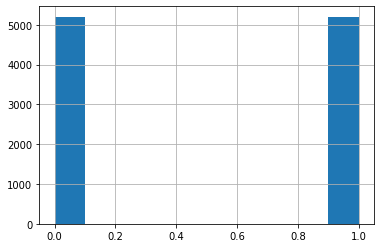

In [16]:
print(upsampled_data['high_performing'].value_counts())
upsampled_data['high_performing'].hist()
plt.show()

In [17]:
upsampled_data.describe()

,weekday,year,id_driver,num_trucks,days_signup_to_approval,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,median_load,high_performing
count,10402.000000,10402.000000,10402.000000,10360.000000,8783.000000,10402.000000,10402.000000,10402.000000,10402.00000,10402.000000,10402.000000,10402.000000,10402.000000,10402.000000
mean,2.977408,2019.844068,21976.794847,9.690927,176.449846,343.753701,19.077004,171.591905,190.66891,125.609017,30.477889,156.086906,2.536051,0.500000
std,1.441007,1.532492,11427.758128,29.757183,307.539222,528.715262,67.807708,286.028337,288.15522,482.007153,62.852704,478.272840,2.603478,0.500024
min,1.000000,2015.000000,20.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,2019.000000,12770.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,3.000000,2021.000000,22478.000000,1.000000,6.000000,318.000000,0.000000,0.000000,7.00000,1.000000,0.000000,20.000000,1.000000,0.500000
75%,3.000000,2021.000000,33064.000000,6.000000,262.500000,509.000000,3.000000,331.000000,355.00000,8.000000,34.000000,113.750000,4.000000,1.000000
max,7.000000,2021.000000,38096.000000,195.000000,1653.000000,4250.000000,902.000000,1324.000000,1348.00000,4266.000000,371.000000,4266.000000,80.000000,1.000000


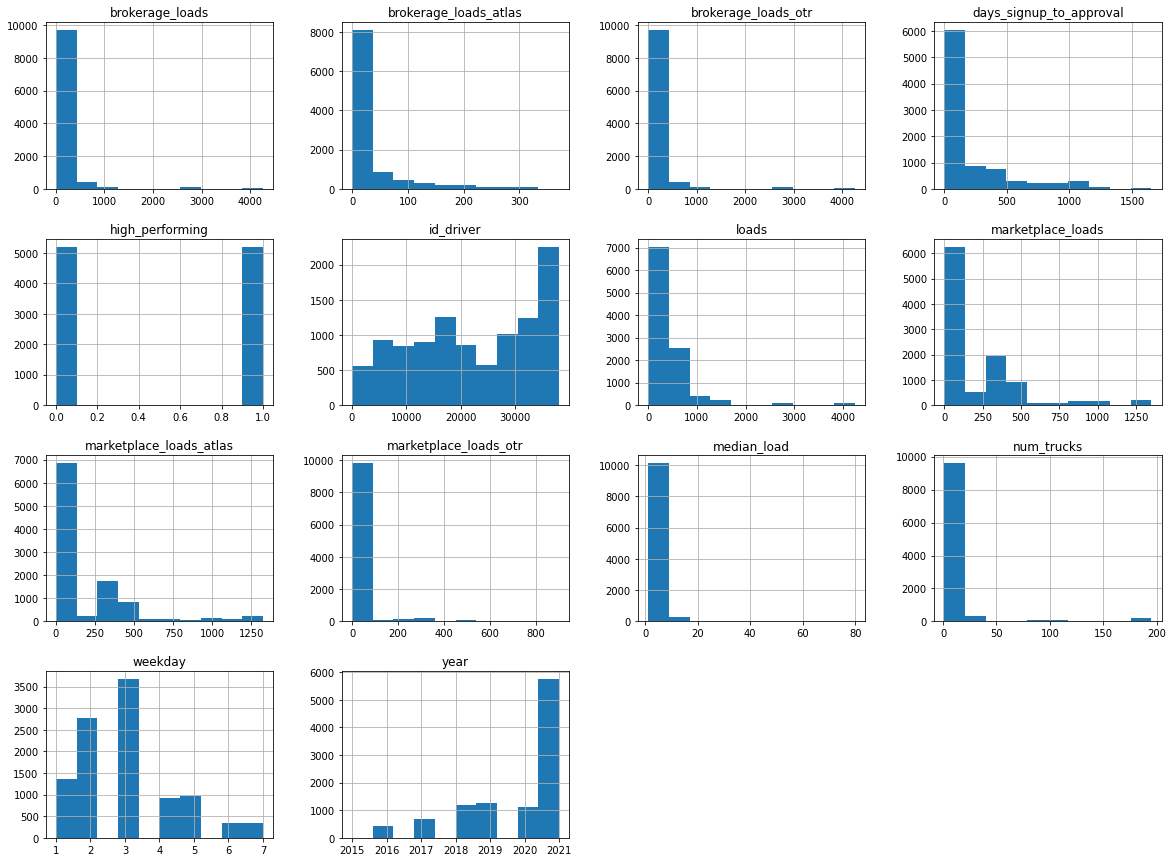

In [18]:
upsampled_data.hist(figsize=(20,15))
plt.show()

In [19]:
corr_matrix = upsampled_data.corr()
corr_matrix

,weekday,year,id_driver,num_trucks,days_signup_to_approval,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,median_load,high_performing
weekday,1.000000,-0.155674,-0.097298,0.038462,0.061459,-0.226200,-0.044871,-0.141952,-0.151463,-0.164628,0.030276,-0.161934,-0.143053,-0.248388
year,-0.155674,1.000000,0.674970,-0.051300,-0.570392,0.469788,0.183468,0.450397,0.490245,0.179497,0.363545,0.228674,0.395524,0.754319
id_driver,-0.097298,0.674970,1.000000,0.028652,-0.702833,0.111709,-0.095474,0.336412,0.311462,-0.111150,0.359678,-0.064751,0.423581,0.379520
num_trucks,0.038462,-0.051300,0.028652,1.000000,0.042963,-0.082979,-0.058437,-0.156717,-0.169344,0.013290,-0.114760,-0.001683,-0.104511,-0.236876
days_signup_to_approval,0.061459,-0.570392,-0.702833,0.042963,1.000000,-0.223833,-0.029253,-0.263793,-0.270852,-0.033357,-0.230859,-0.069994,-0.285556,-0.338273
loads,-0.226200,0.469788,0.111709,-0.082979,-0.223833,1.000000,0.085300,0.434678,0.451543,0.809229,0.213974,0.843667,0.396110,0.601617
marketplace_loads_otr,-0.044871,0.183468,-0.095474,-0.058437,-0.029253,0.085300,1.000000,-0.087050,0.148909,0.017632,-0.093541,0.005477,-0.138009,0.216828
marketplace_loads_atlas,-0.141952,0.450397,0.336412,-0.156717,-0.263793,0.434678,-0.087050,1.000000,0.972135,-0.152867,0.413153,-0.099766,0.358189,0.580123
marketplace_loads,-0.151463,0.490245,0.311462,-0.169344,-0.270852,0.451543,0.148909,0.972135,1.000000,-0.147590,0.388091,-0.097741,0.323069,0.626865
brokerage_loads_otr,-0.164628,0.179497,-0.111150,0.013290,-0.033357,0.809229,0.017632,-0.152867,-0.147590,1.000000,-0.124382,0.991462,0.205973,0.234799


In [20]:
corr_matrix["high_performing"].sort_values(ascending=False)

high_performing            1.000000
year                       0.754319
marketplace_loads          0.626865
loads                      0.601617
marketplace_loads_atlas    0.580123
median_load                0.501623
brokerage_loads_atlas      0.456339
id_driver                  0.379520
brokerage_loads            0.296602
brokerage_loads_otr        0.234799
marketplace_loads_otr      0.216828
num_trucks                -0.236876
weekday                   -0.248388
days_signup_to_approval   -0.338273
Name: high_performing, dtype: float64

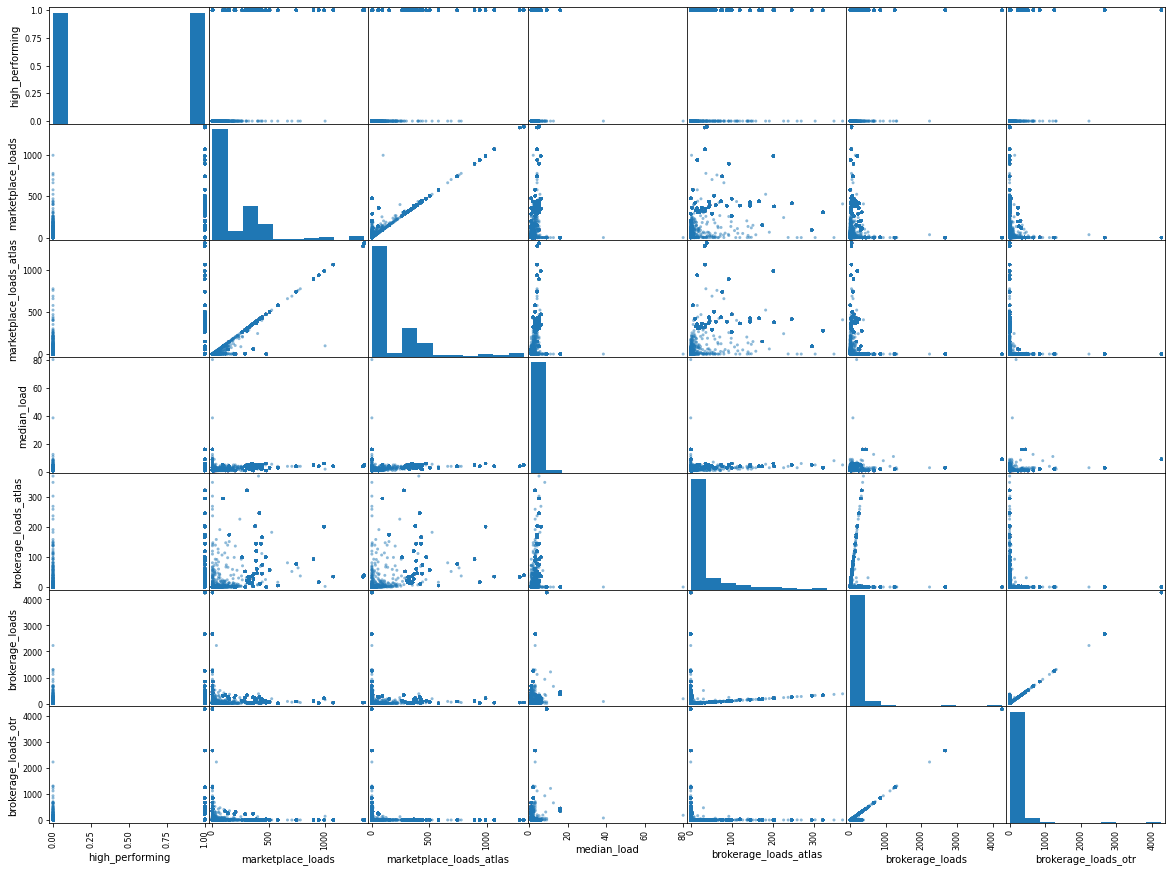

In [21]:
attributes = ["high_performing", "marketplace_loads", "marketplace_loads_atlas", "median_load",
              "brokerage_loads_atlas", 'brokerage_loads', 'brokerage_loads_otr']
scatter_matrix(upsampled_data[attributes], figsize=(20, 15))
plt.show()

### Findings: 

All of the loads-related columns are extremely right-skewed. On average, drivers have been assigned more jobs through brokers than through the NEXT marketplace. For loads assigned through brokers, they are more likely to be OTR loads than drayage jobs. The median loads that a driver carries per job is 1.

`marketplace_loads` and `marketplace_loads_atlas` have a very high correlation with `high_performing` of over 0.5 each. `brokerage_loads_atlas`, `brokerage_loads`, and `brokerage_loads_otr` also have moderate correlations with `high_performing`. `marketplace_loads` is highly correlated to `marketplace_loads_atlas` and moderately correlated to `marketplace_loads_otr`, showing some collinearity within the dataset. `brokerage_loads` is very highly correlated to `brokerage_loads_otr`. 

# 4. Create a data feature extraction plan and implement a pipeline to execute it

a. Determine which fields to retain and which to drop.

b. For those you retain, determine a categorization strategy

c. Determine an imputation strategy (you should choose more than one imputation
method depending on the specifics of your data

d. Augment at least one feature, ideally a feature cross, or non-linear transition

e. Determine a strategy for scaling features

f. Implement a single pipeline to execute this transformation

g. Document your data strategy in your report. Provide an explanation or
justification for why you chose the data you did, and also detail any experiments
you ran and the results

In [22]:
upsampled_data.isnull().sum()

dt                              0
weekday                         0
year                            0
id_driver                       0
id_carrier_number               0
dim_carrier_type                0
dim_carrier_company_name        7
home_base_city                 12
home_base_state                12
carrier_trucks                  0
num_trucks                     42
interested_in_drayage           0
port_qualified                  0
signup_source                   0
ts_signup                       0
ts_first_approved            1619
days_signup_to_approval      1619
driver_with_twic                0
dim_preferred_lanes         10210
first_load_date                 0
load_day                        0
loads                           0
marketplace_loads_otr           0
marketplace_loads_atlas         0
marketplace_loads               0
brokerage_loads_otr             0
brokerage_loads_atlas           0
brokerage_loads                 0
date                            0
recent_date   

## Pipeline

In [35]:
unlabeled = upsampled_data.drop("high_performing", axis=1)
labels = upsampled_data["high_performing"].copy()

#### Drop vs. retain fields

In [36]:
# drop features 
unlabeled = unlabeled.drop(labels=['load_day',                       #redundant on dt
                                  'id_driver','id_carrier_number',    #not relevant
                                  'dim_carrier_company_name', 'home_base_city', #too many values to OHE
                                  'dim_preferred_lanes', 'ts_first_approved', 'days_signup_to_approval',  #too many null values
                                  ], axis=1) 

#### Imputation

In [37]:
state_mode = str(unlabeled['home_base_state'].mode())
unlabeled['home_base_state'] = unlabeled['home_base_state'].fillna(state_mode) # mode value - 87% are CA 

truck_median = unlabeled['num_trucks'].median()
unlabeled['num_trucks'] = unlabeled['num_trucks'].fillna(truck_median) # right-skewed so use median
unlabeled.isnull().sum()

dt                         0
weekday                    0
year                       0
dim_carrier_type           0
home_base_state            0
carrier_trucks             0
num_trucks                 0
interested_in_drayage      0
port_qualified             0
signup_source              0
ts_signup                  0
driver_with_twic           0
first_load_date            0
loads                      0
marketplace_loads_otr      0
marketplace_loads_atlas    0
marketplace_loads          0
brokerage_loads_otr        0
brokerage_loads_atlas      0
brokerage_loads            0
date                       0
recent_date                0
median_load                0
dtype: int64

#### Augmenting Features

#### Categorization strategy

In [38]:
# change date representations to ints

unlabeled['dt'] = unlabeled['dt'].apply(lambda d : int(pd.to_datetime(d).timestamp()))
unlabeled['ts_signup'] = unlabeled['ts_signup'].apply(lambda d : int(pd.to_datetime(d).timestamp()))
unlabeled['first_load_date'] = unlabeled['first_load_date'].apply(lambda d : int(pd.to_datetime(d).timestamp()))
unlabeled['recent_date'] = unlabeled['recent_date'].apply(lambda d : int(pd.to_datetime(d).timestamp()))


# group by numeric or categorical
data_num = ['year','num_trucks', 'loads', 
            'marketplace_loads_otr', 'marketplace_loads_atlas','marketplace_loads', 
            'brokerage_loads_otr', 'brokerage_loads_atlas', 'brokerage_loads', 
            'median_load', 'dt', 'ts_signup','first_load_date', 'recent_date']
data_cat = ['weekday', 'dim_carrier_type','home_base_state', 'carrier_trucks', 'interested_in_drayage', 'port_qualified',
           'signup_source', 'driver_with_twic']

#### Combine into pipeline

In [39]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
#         ('attribs_adder', AugmentFeatures()),
        ('std_scaler', StandardScaler()),
    ])

numerical_features = data_num
categorical_features = data_cat

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ])

prepared_data = full_pipeline.fit_transform(unlabeled)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(prepared_data, labels, test_size=0.2, random_state=10)

# 5. Implement a basic Logistic Regression - 
** piazza post corrected to logistic from linear

With your newly pipelined data, find and interpret important features (e.g. using regression and associated p-values). If there are any collinearities be careful when incorporating them into the regression.

Accuracy:    0.997117
Precision:   0.994012
Recall:      1.000000
F1 Score:    0.996997


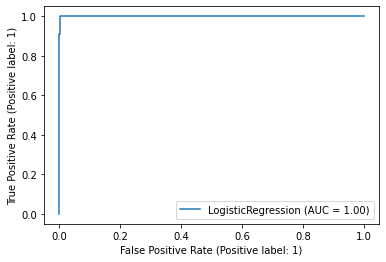

In [41]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
log_predicted = log_reg.predict(X_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, log_predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, log_predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, log_predicted)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, log_predicted)))

#ROC curve
metrics.plot_roc_curve(log_reg, X_test, y_test)  
plt.show()  

In [42]:
log_reg.coef_.shape

(1, 88)

### not sure how to interpret important features or p-values?? watching this piazza post https://piazza.com/class/kjdcwsz1c306g7?cid=251

# 6. PCA

We used TruncatedSVD (singular value decomposition) instead of PCA for this step because SVD works better with sparse matrices, which we had.

In [43]:
svd = TruncatedSVD(n_components=10, random_state=10)
svd.fit(X_train)
print(svd.explained_variance_ratio_)

X_train_transformed = svd.transform(X_train)
X_test_transformed = svd.transform(X_test)

[0.37899386 0.00261586 0.16898199 0.09416584 0.07857138 0.05637201
 0.04127874 0.03394018 0.0232264  0.02057889]


# 7. Ensemble Method

In [45]:
# Employ an ensemble method

bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
bc.fit(X_train_transformed, y_train)
bc_pred = bc.predict(X_test_transformed)


print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, bc_pred)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, bc_pred)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, bc_pred)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, bc_pred)))
# BRUH

Accuracy:    0.999039
Precision:   0.997996
Recall:      1.000000
F1 Score:    0.998997


# 8. Neural Network

In [60]:
nn = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(50,50))
nn.fit(X_train_transformed, y_train)
nn_pred = nn.predict(X_test_transformed)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, nn_pred)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, nn_pred)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, nn_pred)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, nn_pred)))

Accuracy:    0.999519
Precision:   0.998997
Recall:      1.000000
F1 Score:    0.999498
